#**PROBLEMA DE NEGOCIO**


---




##Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Cómo ha evolucionado el número de muertes por COVID-19 a lo largo del tiempo?

#**1. Configuración del Ambiente**

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import requests
from io import StringIO
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor

In [3]:

!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'
print('------')
!pip show numpy | grep 'Name\|Version'
print('------')
!pip show seaborn | grep 'Name\|Version'


Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1
------
Name: numpy
Version: 1.23.5
------
Name: seaborn
Version: 0.13.1


#**2. Obtención, Tratamiento y Análisis Exploratorio (EDA)**

## **2.1.- Cargando Base de Datos**




In [4]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx',
                              sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [5]:
display(df_covid.head())
display(df_population.tail())

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-05           AF  Afghanistan       EMRO        NaN   
1    2020-01-12           AF  Afghanistan       EMRO        NaN   
2    2020-01-19           AF  Afghanistan       EMRO        NaN   
3    2020-01-26           AF  Afghanistan       EMRO        NaN   
4    2020-02-02           AF  Afghanistan       EMRO        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         NaN                  0  
4                 0         NaN                  0

Index    Variant Region, subregion, country or area * Notes  \
20305  20306  Estimates                                Samoa   NaN   
20377  20378  Estimates                              Tokelau    35   
20449  20450  Estimates                                Tonga   NaN   
20521  20522  Estimates                               Tuvalu   NaN   
20593  20594  Estimates            Wallis and Futuna Islands     2   

       Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**  \
20305            882             WSM              WS        882.0   
20377            772             TKL              TK        772.0   
20449            776             TON              TO        776.0   
20521            798             TUV              TV        798.0   
20593            876             WLF              WF        876.0   

               Type  Parent code    Year  \
20305  Country/Area          957  2019.0   
20377  Country/Area          957  2019.0   
20449  Country/Area          957  2019.0   
20521  Country/Area          957  2019.0   
20593  Country/Area          957  2019.0   

      Total Population, as of 1 January (thousands)  \
20305                                       210.752   
20377                                         1.688   
20449                                       105.028   
20521                                        10.914   
20593                                        11.761   

      Total Population, as of 1 July (thousands)  \
20305                                    211.905   
20377                                      1.752   
20449                                    104.951   
20521                                     10.956   
20593                                     11.714   

      Male Population, as of 1 July (thousands)  \
20305                                   108.147   
20377                                     0.879   
20449                                    51.994   
20521                                     5.654   
20593                                     5.648   

      Female Population, as of 1 July (thousands)  \
20305                                     103.759   
20377                                       0.874   
20449                                      52.956   
20521                                       5.301   
20593                                       6.066   

      Population Density, as of 1 July (persons per square km)  \
20305                                             74.878         
20377                                                146         
20449                                            161.462         
20521                                              365.2         
20593                                             83.671         

      Population Sex Ratio, as of 1 July (males per 100 females)  \
20305                                            104.229           
20377                                            100.572           
20449                                             98.182           
20521                                            106.658           
20593                                             93.109           

      Median Age, as of 1 July (years)  \
20305                           20.412   
20377                           26.398   
20449                           21.259   
20521                           24.729   
20593                           34.962   

      Natural Change, Births minus Deaths (thousands)  \
20305                                           4.774   
20377                                           0.018   
20449                                           1.748   
20521                                           0.147   
20593                                           0.072   

      Rate of Natural Change (per 1,000 population)  \
20305                                        22.395   
20377                                        10.802   
20449                                        16.515   
20521         

##**2.2.- EDA Base Covid World Health Organization**

In [6]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [7]:
df_covid.isna().sum().sort_values(ascending = False)

New_deaths           26664
New_cases            14258
WHO_region            5088
Country_code          1484
Country               1272
Date_reported            0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

In [8]:
# Eliminación de registros con valores nulos en la columna 'Country_code'
df_covid_limpio = df_covid.dropna(subset=['Country_code'])

In [9]:
df_covid_limpio.isna().sum().sort_values(ascending = False)

New_deaths           25308
New_cases            12960
WHO_region            3816
Date_reported            0
Country_code             0
Country                  0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

In [10]:
#Selección y retención de las columnas específicas: ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df_covid_limpio = df_covid_limpio[['Date_reported','Country_code','Country','New_cases',
                                   'Cumulative_cases','New_deaths','Cumulative_deaths']]

In [11]:
#sustituir valores nulos por 0
df_covid_limpio=df_covid_limpio.fillna(0)

In [12]:
df_covid_limpio.isna().sum().sort_values(ascending = False)

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [13]:
#Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns]
df_covid_limpio['Date_reported']=pd.to_datetime(df_covid_limpio['Date_reported'], format='%Y-%m-%d')

In [14]:
#Substituir el formato actual de las columnas ['New_cases', 'New_deaths']para un formato de tipo int64.
df_covid_limpio['New_cases'] = pd.to_numeric(df_covid_limpio['New_cases'], errors='coerce').astype(int)
df_covid_limpio['New_deaths'] = pd.to_numeric(df_covid_limpio['New_deaths'], errors='coerce').astype(int)

In [15]:
# Crear una nueva columna 'lethality_rate' con la siguiente fórmula: 'Cumulative_deaths'/'Cumulative_cases'*100

df_covid_limpio['lethality_rate'] = (df_covid_limpio['Cumulative_deaths'] / df_covid_limpio['Cumulative_cases']) * 100

In [16]:
df_covid_limpio.describe()

New_cases  Cumulative_cases    New_deaths  Cumulative_deaths  \
count  4.939600e+04      4.939600e+04  49396.000000       4.939600e+04   
mean   1.567324e+04      1.643477e+06    142.040530       1.928293e+04   
std    2.408294e+05      7.274286e+06    875.025827       7.909933e+04   
min   -6.507900e+04      0.000000e+00  -3432.000000       0.000000e+00   
25%    0.000000e+00      3.846750e+03      0.000000       2.900000e+01   
50%    1.020000e+02      4.283250e+04      0.000000       4.980000e+02   
75%    1.999250e+03      4.998840e+05     20.000000       6.630250e+03   
max    4.047548e+07      1.034368e+08  47687.000000       1.165780e+06   

       lethality_rate  
count    4.530700e+04  
mean              inf  
std               NaN  
min      0.000000e+00  
25%      5.128205e-01  
50%      1.181060e+00  
75%      2.160936e+00  
max               inf

<Axes: >

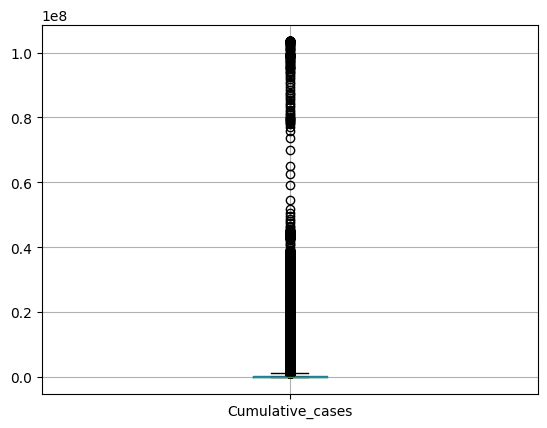

In [17]:
df_covid_limpio.boxplot(['Cumulative_cases'])

<Axes: >

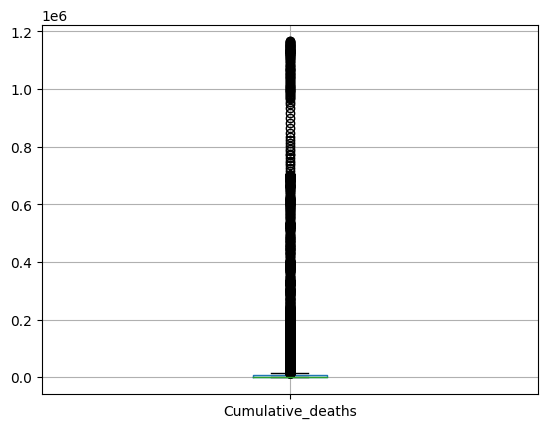

In [18]:
df_covid_limpio.boxplot(['Cumulative_deaths'])

<Axes: >

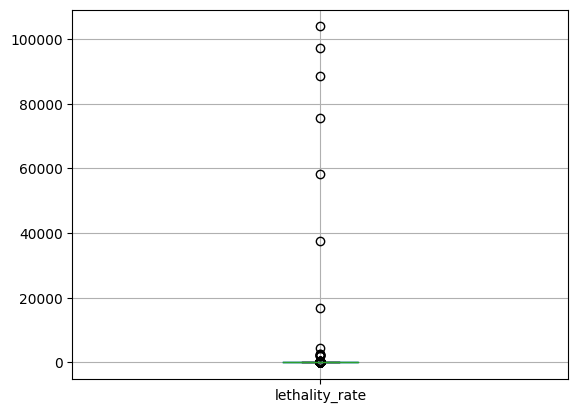

In [19]:
df_covid_limpio.boxplot(['lethality_rate'])

In [20]:
#Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99
q_low = df_covid_limpio['lethality_rate'].quantile(0)
q_high = df_covid_limpio['lethality_rate'].quantile(0.99)
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= q_low) & (df_covid_limpio['lethality_rate'] <= q_high)]

<Axes: >

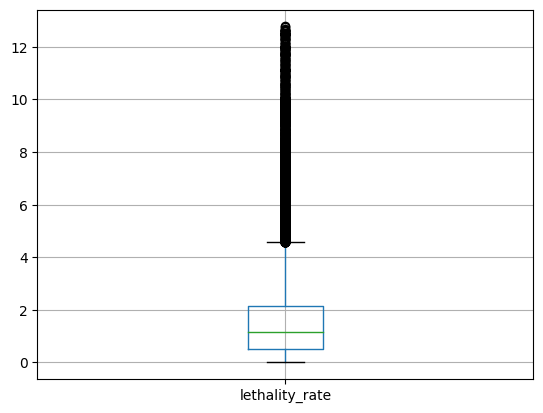

In [21]:
df_covid_limpio.boxplot(['lethality_rate'])

In [22]:
df_covid_limpio.describe()

New_cases  Cumulative_cases    New_deaths  Cumulative_deaths  \
count  4.485300e+04      4.485300e+04  44853.000000       4.485300e+04   
mean   1.722128e+04      1.809406e+06    151.147125       2.114609e+04   
std    2.526782e+05      7.614161e+06    905.888414       8.276044e+04   
min   -6.507900e+04      1.000000e+00  -3432.000000       0.000000e+00   
25%    5.000000e+00      8.173000e+03      0.000000       7.300000e+01   
50%    1.720000e+02      6.399300e+04      1.000000       8.030000e+02   
75%    2.624000e+03      6.263340e+05     26.000000       7.975000e+03   
max    4.047548e+07      1.034368e+08  47687.000000       1.165780e+06   

       lethality_rate  
count    44853.000000  
mean         1.595293  
std          1.666892  
min          0.000000  
25%          0.504360  
50%          1.164988  
75%          2.126546  
max         12.776413

In [23]:
#Finalmente reiniciaremos el índice del dataframe final df_covid_limpio
df_covid_limpio.reset_index(drop=True, inplace=True)

In [24]:
df_covid_limpio.tail()

Date_reported Country_code   Country  New_cases  Cumulative_cases  \
44848    2023-12-24           ZW  Zimbabwe         23            266048   
44849    2023-12-31           ZW  Zimbabwe         23            266071   
44850    2024-01-07           ZW  Zimbabwe         46            266117   
44851    2024-01-14           ZW  Zimbabwe         85            266202   
44852    2024-01-21           ZW  Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
44848           1               5731        2.154123  
44849           0               5731        2.153936  
44850           3               5734        2.154691  
44851           3               5737        2.155130  
44852           0               5737        2.154685

##**2.3.- EDA Base Population United Nations**

In [25]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-c

In [26]:
#Mantener en el dataframe sólo algunas columnas
df_population_limpio=df_population[['ISO2 Alpha-code','Total Population, as of 1 July (thousands)',
                                    'Male Population, as of 1 July (thousands)',
                                    'Female Population, as of 1 July (thousands)',
                                    'Population Density, as of 1 July (persons per square km)',
                                    'Life Expectancy at Birth, both sexes (years)']]

In [27]:
df_population_limpio.head()

ISO2 Alpha-code Total Population, as of 1 July (thousands)  \
69              NaN                                7764951.032   
142             NaN                                1080677.346   
214             NaN                                  530149.56   
286             NaN                                2021559.651   
358             NaN                                2324282.002   

    Male Population, as of 1 July (thousands)  \
69                                3906407.855   
142                                538158.386   
214                                273104.233   
286                               1033583.865   
358                                1176368.32   

    Female Population, as of 1 July (thousands)  \
69                                  3858543.178   
142                                  542518.959   
214                                  257045.327   
286                                  987975.786   
358                                 1147913.681   

    Population Density, as of 1 July (persons per square km)  \
69                                              59.546         
142                                             49.425         
214                                             42.485         
286                                            195.683         
358                                            143.117         

    Life Expectancy at Birth, both sexes (years)  
69                                         72.79  
142                                       60.725  
214                                       73.392  
286                                       70.615  
358                                       77.013

In [28]:
#Renombrar columnas
df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
}, inplace=True)

In [29]:
df_population_limpio.head()

Country_code Total_Population Male_Population Female_Population  \
69           NaN      7764951.032     3906407.855       3858543.178   
142          NaN      1080677.346      538158.386        542518.959   
214          NaN        530149.56      273104.233        257045.327   
286          NaN      2021559.651     1033583.865        987975.786   
358          NaN      2324282.002      1176368.32       1147913.681   

    Population_Density Life_Expectancy  
69              59.546           72.79  
142             49.425          60.725  
214             42.485          73.392  
286            195.683          70.615  
358            143.117          77.013

In [30]:
df_population_limpio.isna().sum().sort_values(ascending = False)

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

In [31]:
#Eliminar valores nulos
df_population_limpio.dropna(inplace=True)

In [32]:
#Filtrar los valores que tengan valores inf en el dataframe df_population_limpio
df_inf=df_population_limpio[df_population_limpio.isin([np.inf,-np.inf,'...']).any(axis=1)]
df_inf

Country_code Total_Population Male_Population Female_Population  \
12817           VA            0.528             ...               ...   

      Population_Density Life_Expectancy  
12817               1200             ...

In [33]:
df_population_limpio=df_population_limpio.drop(12817)

In [34]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        235 non-null    object
 1   Total_Population    235 non-null    object
 2   Male_Population     235 non-null    object
 3   Female_Population   235 non-null    object
 4   Population_Density  235 non-null    object
 5   Life_Expectancy     235 non-null    object
dtypes: object(6)
memory usage: 12.9+ KB


In [35]:
columnas=['Total_Population','Male_Population','Female_Population','Population_Density','Life_Expectancy']
df_population_limpio[columnas] = df_population_limpio[columnas].apply(pd.to_numeric, errors='coerce').astype(float)

In [36]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        235 non-null    object 
 1   Total_Population    235 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  235 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


<Axes: >

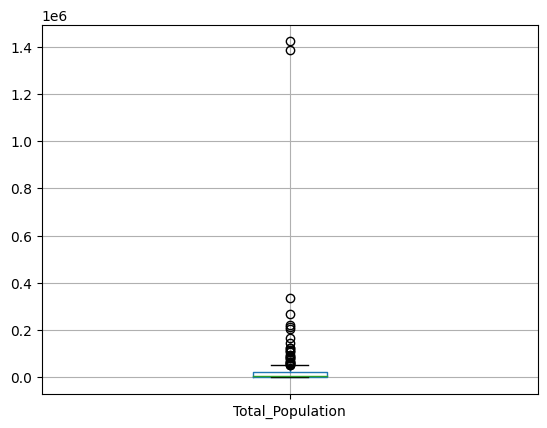

In [37]:
df_population_limpio.boxplot(['Total_Population'])

<Axes: >

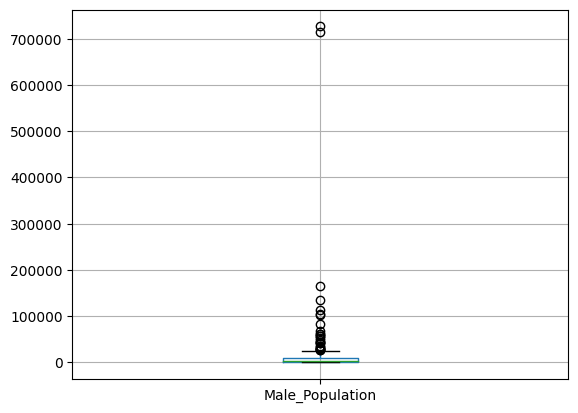

In [38]:
df_population_limpio.boxplot(['Male_Population'])

<Axes: >

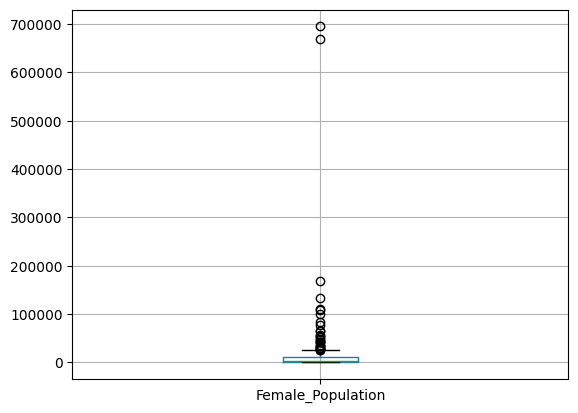

In [39]:
df_population_limpio.boxplot(['Female_Population'])

<Axes: >

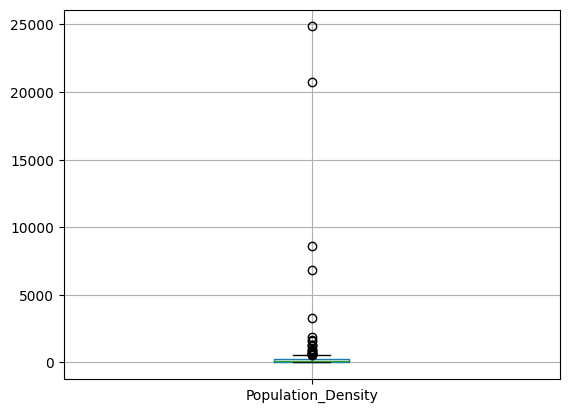

In [40]:
df_population_limpio.boxplot(['Population_Density'])

In [41]:
# Calcular el rango intercuartílico (IQR) para cada columna
Q1 = df_population_limpio.quantile(0.25)
Q3 = df_population_limpio.quantile(0.75)
IQR = Q3 - Q1

# Identificar registros que son outliers
outliers_mask = ((df_population_limpio < (Q1 - 1.5 * IQR)) | (df_population_limpio > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df = df_population_limpio[outliers_mask]
outliers_df

<ipython-input-41-b5fcb4a2df63>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_population_limpio.quantile(0.25)
<ipython-input-41-b5fcb4a2df63>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_population_limpio.quantile(0.75)
<ipython-input-41-b5fcb4a2df63>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = ((df_population_limpio < (Q1 - 1.5 * IQR)) | (df_population_limpio > (Q3 + 1.5 * IQR))).any(axis=1)


Country_code  Total_Population  Male_Population  Female_Population  \
2089            ET        114120.594        57375.433          56745.161   
2161            KE         50951.450        25272.193          25679.257   
2377            MU          1296.279          640.524            655.755   
2449            YT           294.489          139.735            154.754   
3025            TZ         59872.579        29563.439          30309.141   
3673            CD         89906.890        44600.412          45306.478   
4105            EG        105618.671        53429.404          52189.268   
4897            ZA         58087.055        28207.948          29879.107   
5905            NG        203304.492       102680.839         100623.652   
6841            CN       1421864.031       726781.914         695082.117   
6913            HK          7496.122         3461.876           4034.246   
6985            MO           663.653          312.356            351.296   
7057            TW         23777.737        11802.406          11975.331   
7201            JP        125791.677        61158.671          64633.006   
7345            KR         51803.829        25894.464          25909.365   
7561            BD        165516.222        82164.179          83352.043   
7705            IN       1383112.050       714325.057         668786.993   
7777            IR         86564.202        43792.157          42772.045   
7849            MV           504.508          291.624            212.884   
7993            PK        223293.280       113015.042         110278.237   
8353            ID        269582.878       135798.442         133784.436   
8569            MM         53040.212        26423.311          26616.900   
8641            PH        110380.804        56011.134          54369.671   
8713            SG          5866.405         3066.573           2799.832   
8785            TH         71307.763        34723.388          36584.375   
8929            VN         95776.716        47288.433          48488.283   
9217            BH          1494.188          933.409            560.779   
9721            LB          5781.907         2814.124           2967.783   
10009           PS          4909.775         2446.813           2462.962   
10153           TR         83481.684        41866.950          41614.734   
11017           RU        145742.286        67697.114          78045.173   
11593           GG            62.365           30.845             31.520   
11881           JE           107.045           52.758             54.286   
12241           GB         66778.659        32972.061          33806.598   
12673           GI            32.685           16.320             16.366   
12889           IT         59727.932        29090.258          30637.674   
13033           MT           503.635          259.634            244.000   
13321           SM            34.178           16.650             17.527   
13825           FR         64399.759        31141.251          33258.507   
13897           DE         83148.141        41023.579          42124.562   
14113           MC            37.034           18.145             18.890   
14617           AW           106.442           50.188             56.254   
14761           BB           280.180          134.222            145.957   
16057           MF            33.121           15.749             17.372   
16201           SX            42.980           22.849             20.131   
16921           MX        125085.311        61187.228          63898.082   
17353           BR        211782.878       104119.798         107663.080   
18289           BM            63.812           30.878             32.934   
18577           US        334319.671       165698.830         168620.840   
19729           NR            12.132            6.177              5.955   

       Population_Density  Life_Expectancy  
2089              114.121           65.838  
2161               87.737           62.

In [42]:
print(len(outliers_df))

50


In [43]:
df_population_limpio['Country_code'].unique()

array(['BI', 'KM', 'DJ', 'ER', 'ET', 'KE', 'MG', 'MW', 'MU', 'YT', 'MZ',
       'RE', 'RW', 'SC', 'SO', 'SS', 'UG', 'TZ', 'ZM', 'ZW', 'AO', 'CM',
       'CF', 'TD', 'CG', 'CD', 'GQ', 'GA', 'ST', 'DZ', 'EG', 'LY', 'MA',
       'SD', 'TN', 'EH', 'BW', 'SZ', 'LS', 'ZA', 'BJ', 'BF', 'CV', 'CI',
       'GM', 'GH', 'GN', 'GW', 'LR', 'ML', 'MR', 'NE', 'NG', 'SH', 'SN',
       'SL', 'TG', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'CN', 'HK', 'MO', 'TW',
       'KP', 'JP', 'MN', 'KR', 'AF', 'BD', 'BT', 'IN', 'IR', 'MV', 'NP',
       'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH',
       'TL', 'VN', 'AM', 'AZ', 'BH', 'CY', 'GE', 'IQ', 'IL', 'JO', 'KW',
       'LB', 'OM', 'QA', 'SA', 'PS', 'SY', 'TR', 'AE', 'YE', 'BY', 'BG',
       'CZ', 'HU', 'PL', 'MD', 'RO', 'RU', 'SK', 'UA', 'DK', 'EE', 'FO',
       'FI', 'GG', 'IS', 'IE', 'IM', 'JE', 'LV', 'LT', 'NO', 'SE', 'GB',
       'AL', 'AD', 'BA', 'HR', 'GI', 'GR', 'IT', 'XK', 'MT', 'ME', 'MK',
       'PT', 'SM', 'RS', 'SI', 'ES', 'AT', 'BE', 'F

In [44]:
#calcular el porcentaje de poblacion total que perderia si eliminaba esos registros outliers_df
percentage_lost = (len(outliers_df) / len(df_population_limpio)) * 100
print(f"Porcentaje de población total perdida al eliminar valores atípicos: {percentage_lost:.2f}%")

Porcentaje de población total perdida al eliminar valores atípicos: 21.28%


In [45]:
#calcular el porcentaje de poblacion total que perderia si eliminaba esos registros outliers_df en el Perú
percentage_lost = (len(outliers_df[outliers_df['Country_code']=='PE']) / len(df_population_limpio)) * 100
print(f"Porcentaje de población total perdida al eliminar valores atípicos en Perú: {percentage_lost:.2f}%")

Porcentaje de población total perdida al eliminar valores atípicos en Perú: 0.00%


**Nota: No eliminamos los valores atipicos**

In [46]:
df_population_limpio.head()

Country_code  Total_Population  Male_Population  Female_Population  \
1801           BI         11874.838         5894.278           5980.560   
1873           KM           790.986          397.126            393.860   
1945           DJ          1073.994          533.626            540.367   
2017           ER          3498.818         1724.860           1773.958   
2089           ET        114120.594        57375.433          56745.161   

      Population_Density  Life_Expectancy  
1801             457.605           62.351  
1873             425.033           64.068  
1945              46.333           63.085  
2017              28.881           67.300  
2089             114.121           65.838

In [47]:
#Multiplicar por 1000 el valor actual de las siguientes columnas 'Total_Population','Male_Population','Female_Population' y sobreescribirlas.
df_population_limpio['Total_Population'] = df_population_limpio['Total_Population'] * 1000
df_population_limpio['Male_Population'] = df_population_limpio['Male_Population'] * 1000
df_population_limpio['Female_Population'] = df_population_limpio['Female_Population'] * 1000
df_population_limpio.head()

Country_code  Total_Population  Male_Population  Female_Population  \
1801           BI        11874838.0        5894278.0          5980560.0   
1873           KM          790986.0         397126.0           393860.0   
1945           DJ         1073994.0         533626.0           540367.0   
2017           ER         3498818.0        1724860.0          1773958.0   
2089           ET       114120594.0       57375433.0         56745161.0   

      Population_Density  Life_Expectancy  
1801             457.605           62.351  
1873             425.033           64.068  
1945              46.333           63.085  
2017              28.881           67.300  
2089             114.121           65.838

In [48]:
#Eliminar valores nulos
df_population_limpio.dropna(inplace=True)

In [49]:
#Reiniciar el indice
df_population_limpio.reset_index(drop=True, inplace=True)

In [50]:
df_population_limpio.head()

Country_code  Total_Population  Male_Population  Female_Population  \
0           BI        11874838.0        5894278.0          5980560.0   
1           KM          790986.0         397126.0           393860.0   
2           DJ         1073994.0         533626.0           540367.0   
3           ER         3498818.0        1724860.0          1773958.0   
4           ET       114120594.0       57375433.0         56745161.0   

   Population_Density  Life_Expectancy  
0             457.605           62.351  
1             425.033           64.068  
2              46.333           63.085  
3              28.881           67.300  
4             114.121           65.838

In [51]:
df_population_limpio.describe()

Total_Population  Male_Population  Female_Population  \
count      2.350000e+02     2.350000e+02       2.350000e+02   
mean       3.303193e+07     1.661798e+07       1.641395e+07   
std        1.344877e+08     6.889130e+07       6.560933e+07   
min        1.752000e+03     8.790000e+02       8.740000e+02   
25%        4.000210e+05     1.948405e+05       2.109970e+05   
50%        5.453924e+06     2.738222e+06       2.767844e+06   
75%        2.075953e+07     1.040942e+07       1.035011e+07   
max        1.421864e+09     7.267819e+08       6.950821e+08   

       Population_Density  Life_Expectancy  
count          235.000000       235.000000  
mean           459.047102        73.489502  
std           2222.151677         7.360874  
min              0.136000        52.910000  
25%             38.731000        68.524500  
50%             95.237000        75.057000  
75%            239.942000        79.100500  
max          24855.034000        86.542000

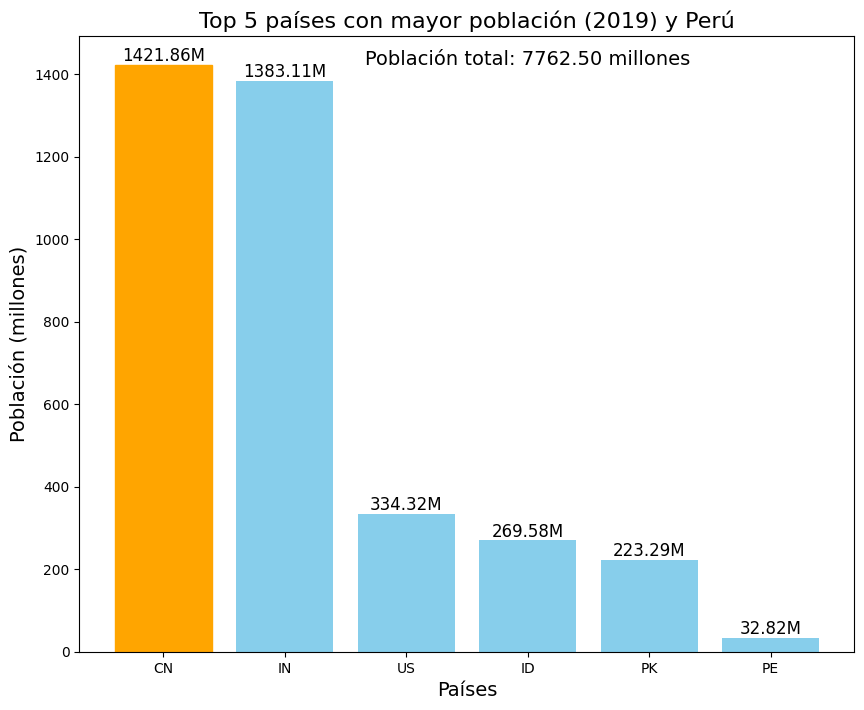

In [52]:
#TOP 5 PAISES
top_5_paises = df_population_limpio.sort_values(by='Total_Population', ascending=False).head(5)
# Preparar datos para el gráfico
paises = top_5_paises['Country_code'].to_list()
#AGREGAMOS AL PAÍS PERÚ
paises.append('PE')
poblaciones = top_5_paises['Total_Population'].to_list()
poblaciones.append(df_population_limpio[df_population_limpio['Country_code'] == 'PE']['Total_Population'].values[0])
poblaciones_millones = [round(x / 1000000, 2) for x in poblaciones]
# Preparar datos para el gráfico
paises = top_5_paises['Country_code'].tolist()
paises.append('PE')
# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
bars = plt.bar(paises, poblaciones_millones, color='skyblue')
# Resaltar la barra con la mayor población
bars[poblaciones_millones.index(max(poblaciones_millones))].set_color('orange')
plt.xlabel('Países', fontsize=14)
plt.ylabel('Población (millones)', fontsize=14)
plt.title('Top 5 países con mayor población (2019) y Perú', fontsize=16)
# Añadir anotaciones con la población en cada barra
for i, poblacion in enumerate(poblaciones_millones):
    plt.annotate(str(poblacion)+'M', xy=(i, poblacion), ha='center', va='bottom', fontsize=12)
# Añadir texto con la población total
plt.text(3, max(poblaciones_millones) + 1, f'Población total: {df_population_limpio["Total_Population"].sum() / 1000000:.2f} millones', ha='center', fontsize=14)
# Mostrar el gráfico
plt.show()

In [53]:
df_covid_limpio.head()

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0    2020-03-01           AF  Afghanistan          1                 1   
1    2020-03-08           AF  Afghanistan          0                 1   
2    2020-03-15           AF  Afghanistan          6                 7   
3    2020-03-22           AF  Afghanistan         17                24   
4    2020-03-29           AF  Afghanistan         67                91   

   New_deaths  Cumulative_deaths  lethality_rate  
0           0                  0        0.000000  
1           0                  0        0.000000  
2           0                  0        0.000000  
3           0                  0        0.000000  
4           2                  2        2.197802

# **Preguntas**

##1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

In [54]:
# Worldwide Distribution
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
#Seleccionamos los 10 primeros paises
top_10_paises = total_por_pais.nlargest(10)
# Incluir a Perú en la lista de países principales si no está entre los 10 primeros
if 'Peru' not in top_10_paises.index:
    top_10_paises.at['Peru'] = df_covid_limpio.loc[df_covid_limpio['Country'] == 'Peru', 'Cumulative_cases'].max()
# Agrupar los demás como "Otros"
otros = total_por_pais.drop(top_10_paises.index).sum()
top_10_paises['Otros'] = otros
top_10_paises

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Peru                                                      4536733
Otros                                                   286983122
Name: Cumulative_cases, dtype: int64

In [55]:
# Case Progression by Country
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
top_5_paises = total_por_pais.nlargest(5)
#Añadimos el país que estamos analizando (Perú)
if 'Peru' not in top_5_paises.index:
    top_5_paises['Peru'] = df_covid_limpio.loc[df_covid_limpio['Country'] == 'Peru', 'Cumulative_cases'].max()
#Reiniciamos el indice
df_covid_limpio_reset = df_covid_limpio.reset_index()
#Filtrar Datos para los Top 5 Países y Perú
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]
#Crear un DataFrame Pivot para la Progresión Temporal
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5

Date_reported             2020-01-05  2020-01-12  2020-01-19  2020-01-26  \
Country                                                                    
China                            1.0        45.0       125.0      1985.0   
France                           0.0         0.0         0.0         3.0   
Germany                          0.0         0.0         0.0         0.0   
India                            0.0         0.0         0.0         0.0   
Peru                             0.0         0.0         0.0         0.0   
United States of America         0.0         0.0         0.0         7.0   

Date_reported             2020-02-02  2020-02-09  2020-02-16  2020-02-23  \
Country                                                                    
China                        14411.0     37251.0     68584.0     77042.0   
France                           6.0        12.0        12.0        16.0   
Germany                          0.0         0.0         0.0         0.0   
India                            2.0         7.0         7.0         7.0   
Peru                             0.0         0.0         0.0         0.0   
United States of America         9.0        20.0        24.0        40.0   

Date_reported             2020-03-01  2020-03-08  2020-03-15  2020-03-22  \
Country                                                                    
China                        79968.0     80859.0     81048.0     81498.0   
France                          16.0        16.0         0.0         0.0   
Germany                        170.0      1075.0      7516.0     29923.0   
India                            7.0        39.0       107.0       360.0   
Peru                             0.0         9.0        47.0       318.0   
United States of America        73.0       464.0      3929.0     31415.0   

Date_reported             2020-03-29  2020-04-05  2020-04-12  2020-04-19  \
Country                                                                    
China                        82341.0     82930.0     83482.0     84201.0   
France                           0.0         0.0         0.0         0.0   
Germany                      63904.0     99971.0    127116.0    144461.0   
India                          979.0      3374.0      8356.0     15712.0   
Peru                           635.0         0.0      5897.0     13489.0   
United States of America    126309.0    302460.0    521632.0    717782.0   

Date_reported             2020-04-26  2020-05-03  2020-05-10  2020-05-17  \
Country                                                                    
China                        84338.0     84393.0     84430.0     84484.0   
France                           0.0         0.0         0.0         0.0   
Germany                     156812.0    164254.0    170497.0    175272.0   
India                        26496.0     39980.0     62939.0     90927.0   
Peru                             0.0         0.0         0.0         0.0   
United States of America    922947.0   1121383.0   1303629.0   1472661.0   

Date_reported             2020-05-24  2020-05-31  2020-06-07  2020-06-14  \
Country                                                                    
China                        84525.0     84570.0     84629.0     84729.0   
France                           0.0         0.0         0.0         0.0   
Germany                     178876.0    182082.0    184436.0    186784.0   
India                       131868.0    182143.0    246628.0    320922.0   
Peru                             0.0         0.0    187400.0    220749.0   
United States of America   1638986.0   1785422.0   1935202.0   2087078.0   

Date_reported             2020-06-21  2020-06-28  2020-07-05  2020-07-12  \
Country                                                                    
China                        84997.0     85190.0     85306.0     85522.0   
France                           0.0         0.0         0.0         0.0   
Germany                     190976.0    19

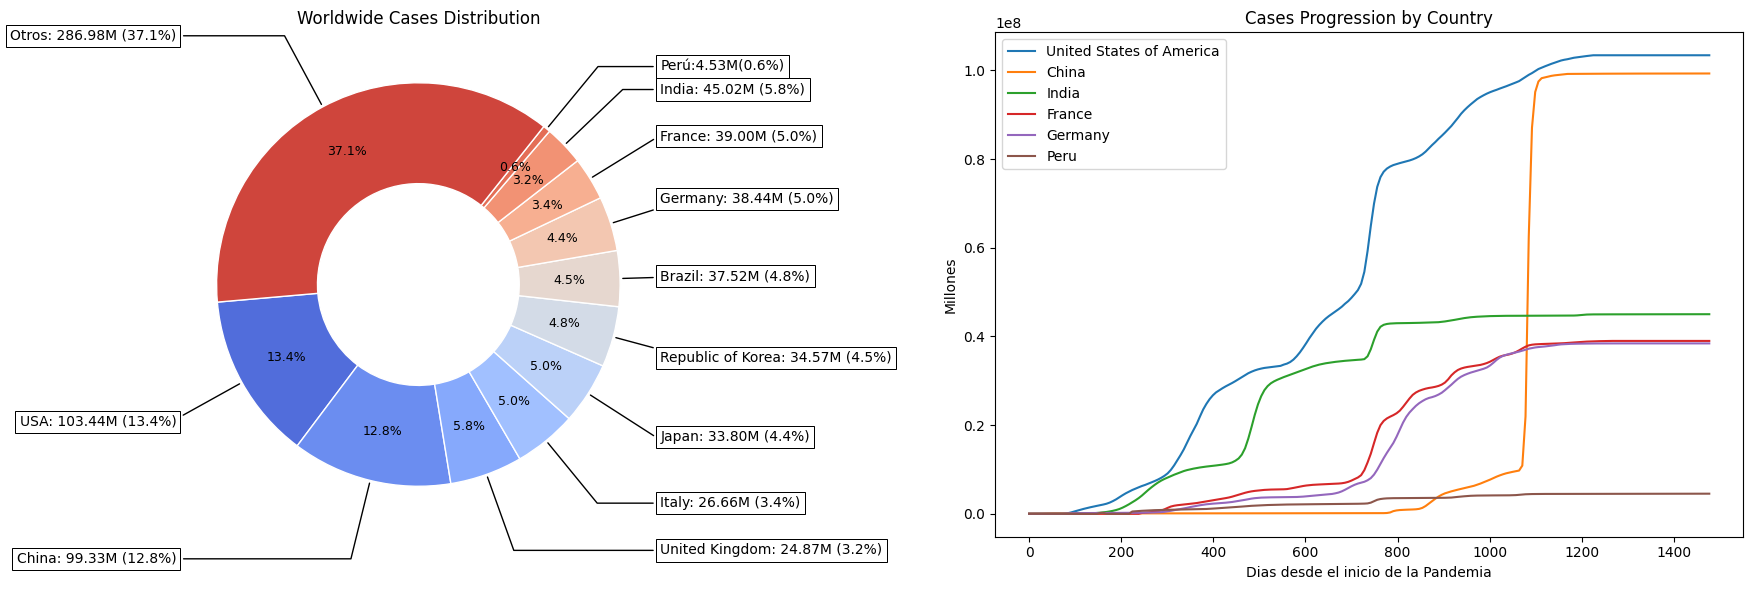

In [56]:
# Tamaño total de la figura
fig = plt.figure(figsize=(18, 6))

# Definir una rejilla con dos columnas (una para cada subplot)
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])

# Primer subplot: Gráfico de pastel
ax0 = fig.add_subplot(gs[0])
etiquetas = ['USA: 103.44M (13.4%)', 'China: 99.33M (12.8%)', 'United Kingdom: 24.87M (3.2%)',
             'Italy: 26.66M (3.4%)', 'Japan: 33.80M (4.4%)', 'Republic of Korea: 34.57M (4.5%)',
             'Brazil: 37.52M (4.8%)', 'Germany: 38.44M (5.0%)', 'France: 39.00M (5.0%)',
             'India: 45.02M (5.8%)', 'Perú:4.53M(0.6%)','Otros: 286.98M (37.1%)']
colores = sns.color_palette('coolwarm', n_colors=len(top_10_paises))
wedges, texts, autotexts = ax0.pie(top_10_paises, colors=colores, autopct='%1.1f%%', textprops={'fontsize': 9},
                                   pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax0.annotate(etiquetas[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)
ax0.set_title('Worldwide Cases Distribution')

# Segundo subplot: Gráfico de líneas
ax1 = fig.add_subplot(gs[1])
for pais in top_5_paises.index:
    days_since_start = (total_acumulado_top_5.columns - total_acumulado_top_5.columns[0]).days
    ax1.plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais)

# Ajustar diseño y leyendas
ax1.set_xlabel('Dias desde el inicio de la Pandemia')
ax1.set_ylabel('Millones')
ax1.set_title('Cases Progression by Country')
ax1.legend()

# Ajustar espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


**Análisis:**

**Distribución mundial de casos:** El gráfico circular muestra que Perú tiene 4.53M de casos, lo que representa el 6% del total mundial. Los otros países mencionados incluyen India, Francia, Alemania, Brasil, Corea del Sur, Japón, Italia, Reino Unido, China y Estados Unidos. El segmento “Otros” representa el 37.1% del total.

**Progresión de casos en el Perú:** El gráfico lineal muestra la progresión de los casos a lo largo del tiempo en varios países, incluido Perú. La línea de Perú muestra una tendencia ascendente moderada, lo que indica un aumento constante en el número de casos.


##2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

In [57]:
#Daily New Cases
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.set_index('Country')
grouped_df = grouped_df.loc[['Peru']]
fechas = grouped_df.columns
new_cases = grouped_df[fechas].diff(axis=1).fillna(0).sum(axis=0)
new_cases = new_cases[new_cases > 0]
new_cases

Date_reported
2020-03-15       38.0
2020-03-22      271.0
2020-03-29      317.0
2020-04-19     7592.0
2020-06-14    33349.0
               ...   
2023-12-03     2094.0
2023-12-10     2534.0
2023-12-17     3289.0
2023-12-24     1333.0
2023-12-31       35.0
Length: 179, dtype: float64

In [58]:
new_cases.max()

326730.0

<ipython-input-59-61f7db72483b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


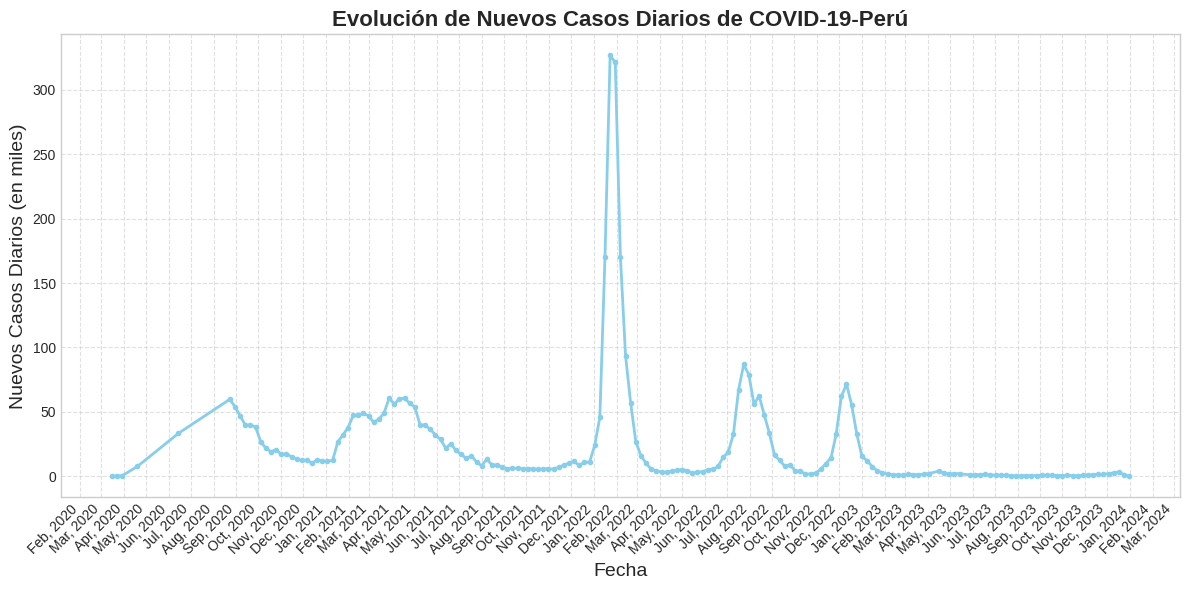

In [59]:
# Ajustar el estilo del gráfico
plt.style.use('seaborn-whitegrid')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar la línea
ax.plot(new_cases.index, new_cases.values / 1e3, marker='.', color='skyblue', linewidth=2)

# Añadir títulos y etiquetas
plt.title('Evolución de Nuevos Casos Diarios de COVID-19-Perú', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Nuevos Casos Diarios (en miles)', fontsize=14)

# Añadir cuadrícula y leyenda
plt.grid(True, linestyle='--', alpha=0.6)

# Formatear el eje x para que muestre las fechas de manera más clara con el año
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Análisis:**

La línea azul Representa los nuevos casos diarios de COVID-19 en el Perú se observa un patrón oscilante con un pico muy pronunciado alrededor de enero del 2022, lo que indica un aumento significativo en los casos nuevos durante ese período hasta abril del 2022.

**El aumento significativo de casos de COVID-19 en Perú entre enero y abril de 2022 podría deberse a varios factores.**

Variantes del virus: Las nuevas variantes del virus, como la variante Ómicron, pueden ser más transmisibles y causar un aumento en el número de casos.
La variante Ómicron del COVID-19 fue confirmada en Perú el 19 de diciembre de 2021

Esto produjo como consecuencia que se incluyera una vacuna de refuerzo es por eso que en abril comienza a bajar los casos de coronavirus


##3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

In [60]:
#Lethality Rate by Country
def get_max_row(group, column):
    return group.loc[group[column].idxmax()]
result = df_covid_limpio.groupby(['Country', df_covid_limpio['Date_reported'].dt.to_period("M")]).apply(lambda group: get_max_row(group, 'lethality_rate'))
result.reset_index(drop=True, inplace=True)
top_4_paises = result.groupby('Country')['lethality_rate'].mean().nlargest(5).index
result = result[result['Country'].isin(top_4_paises)]

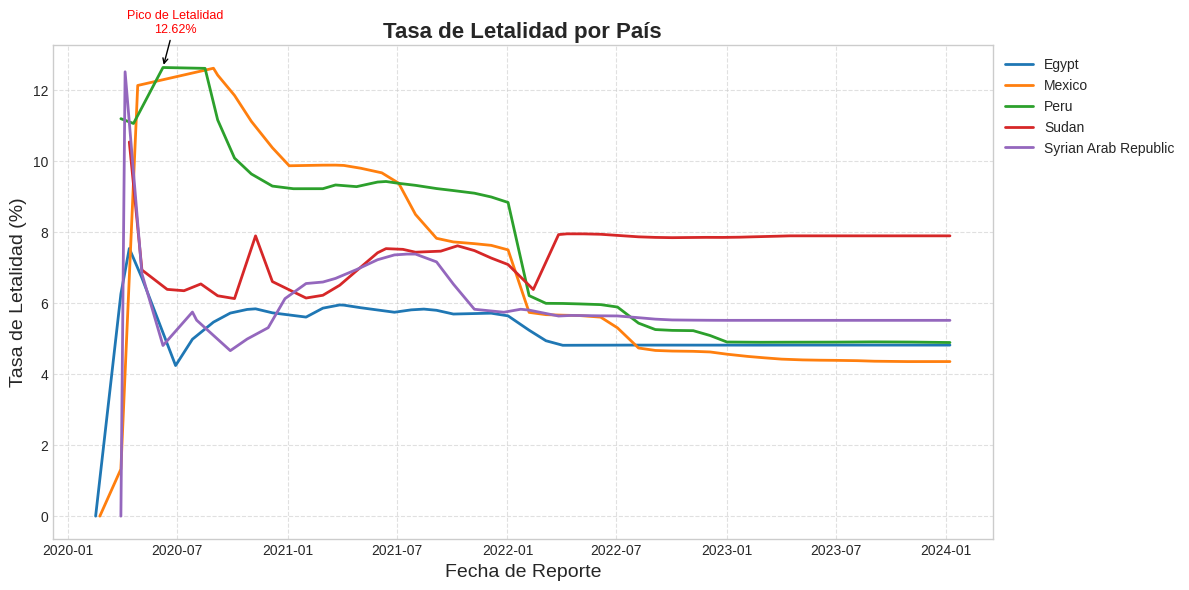

In [61]:
# Crea el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 6))

# Itera sobre cada país y plotea la línea correspondiente
for pais in result['Country'].unique():
    country_data = result[result['Country'] == pais]
    ax.plot(country_data['Date_reported'], country_data['lethality_rate'], label=pais, linewidth=2)

# Encuentra la fecha y la tasa del pico de letalidad en Perú
peru_data = result[result['Country'] == 'Peru']
fecha_pico = peru_data.loc[peru_data['lethality_rate'].idxmax()]['Date_reported']
letalidad_pico = peru_data['lethality_rate'].max()

# Añade una leyenda para identificar cada línea
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Añade una flecha indicando el pico de letalidad en Perú con etiqueta %
ax.annotate(f'Pico de Letalidad\n{letalidad_pico:.2f}%',
            xy=(fecha_pico, letalidad_pico), xytext=(fecha_pico + pd.DateOffset(days=20), letalidad_pico + 1),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            fontsize=9, color='red', ha='center')

# Añade títulos y etiquetas
ax.set_title('Tasa de Letalidad por País', fontsize=16, fontweight='bold')
ax.set_xlabel('Fecha de Reporte', fontsize=14)
ax.set_ylabel('Tasa de Letalidad (%)', fontsize=14)  # Agrega el símbolo %

# Añade cuadrícula para facilitar la lectura del gráfico
ax.grid(True, linestyle='--', alpha=0.6)

# Muestra el gráfico
plt.tight_layout()
plt.show()



**Análisis:**

**Pico de Letalidad:** La tasa de letalidad en Perú, representada por la línea verde, alcanzó su pico alrededor de junio de 2020 con una tasa cercana al 12.62%.

**Tendencia a la Baja:** Desde el pico, la tasa de letalidad ha mostrado una tendencia general a la baja.

**Estabilización:** La tasa de letalidad se estabilizó alrededor del 6% hacia enero de 2022 y se mantuvo relativamente constante hasta enero de 2024.


##4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

In [62]:
#Características demográficas más relevantes
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31']
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False)['lethality_rate'].mean()
df_final = pd.merge(df_agrupado, df_population_limpio, on='Country_code', how='inner')
columnas_seleccionadas = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[columnas_seleccionadas]
X = df_final.drop(['lethality_rate'], axis=1)
y = df_final['lethality_rate']
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Life_Expectancy       0.285993
Population_Density    0.243591
Female_Population     0.190563
Male_Population       0.147572
Total_Population      0.132281
dtype: float64

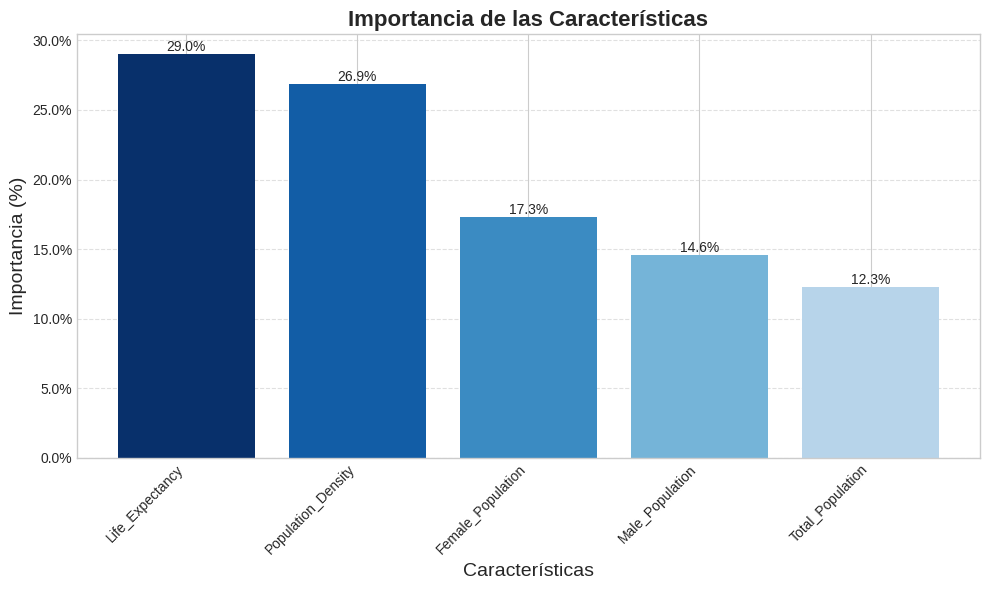

In [66]:
# Crear el gráfico de barras con un fondo blanco
fig, ax = plt.subplots(figsize=(10, 6))

# Generar una paleta de colores similar a 'Blues', pero invertida
colors = cm.Blues(np.linspace(1, 0.3, len(feature_importances)))

# Ordenar las importancias de las características en orden descendente
sorted_importances = feature_importances.sort_values(ascending=False)

# Crear el gráfico de barras
bars = ax.bar(sorted_importances.index, sorted_importances.values, color=colors)

# Añadir títulos y etiquetas
ax.set_title('Importancia de las Características', fontsize=16, fontweight='bold')
ax.set_xlabel('Características', fontsize=14)
ax.set_ylabel('Importancia (%)', fontsize=14)

# Cambiar las etiquetas del eje y a formato de porcentaje
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Agregar una etiqueta de porcentaje a cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*100:.1f}%', ha='center', va='bottom')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir cuadrícula para facilitar la lectura del gráfico
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar automáticamente el diseño para evitar cortar etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()



**Análisis:**

**Expectativa de Vida:** Esta característica tiene la mayor importancia con un 29.0%. Esto sugiere que la expectativa de vida es un factor muy relevante en el conjunto de datos analizado.

**Densidad Poblacional:** La densidad poblacional tiene una importancia del 26.9%, lo que indica que también es un factor significativo.
Esto sugiere que la expectativa de vida y la concentración de población son relevantes en la incidencia de la letalidad del Covid19.


##¿Cómo ha evolucionado el número de muertes por COVID-19 a lo largo del tiempo?

In [67]:
df_covid_limpio

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-03-01           AF  Afghanistan          1                 1   
1        2020-03-08           AF  Afghanistan          0                 1   
2        2020-03-15           AF  Afghanistan          6                 7   
3        2020-03-22           AF  Afghanistan         17                24   
4        2020-03-29           AF  Afghanistan         67                91   
...             ...          ...          ...        ...               ...   
44848    2023-12-24           ZW     Zimbabwe         23            266048   
44849    2023-12-31           ZW     Zimbabwe         23            266071   
44850    2024-01-07           ZW     Zimbabwe         46            266117   
44851    2024-01-14           ZW     Zimbabwe         85            266202   
44852    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               2                  2        2.197802  
...           ...                ...             ...  
44848           1               5731        2.154123  
44849           0               5731        2.153936  
44850           3               5734        2.154691  
44851           3               5737        2.155130  
44852           0               5737        2.154685  

[44853 rows x 8 columns]

In [72]:
!pip install bar_chart_race

In [69]:
# Case Progression by Country
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_deaths'].max().sort_values(ascending=False)
top_20_paises = total_por_pais.nlargest(20)
#Reiniciamos el indice
df_covid_limpio_reset = df_covid_limpio.reset_index()
#Filtrar Datos para los Top 10 Países
df_top_20 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_20_paises.index)]
#Crear un DataFrame Pivot para la Progresión Temporal
total_acumulado_top_20 = df_top_20.pivot(index='Date_reported', columns='Country', values='Cumulative_deaths').fillna(0)
total_acumulado_top_20

Country        Argentina    Brazil     China  Colombia    France   Germany  \
Date_reported                                                                
2020-01-05           0.0       0.0       0.0       0.0       0.0       0.0   
2020-01-12           0.0       0.0       1.0       0.0       0.0       0.0   
2020-01-19           0.0       0.0       3.0       0.0       0.0       0.0   
2020-01-26           0.0       0.0      56.0       0.0       0.0       0.0   
2020-02-02           0.0       0.0     361.0       0.0       0.0       0.0   
...                  ...       ...       ...       ...       ...       ...   
2023-12-24      130691.0  702116.0  121889.0  142727.0  167985.0  174979.0   
2023-12-31      130695.0  702116.0  121893.0  142727.0  167985.0  174979.0   
2024-01-07      130697.0  702116.0  121908.0  142727.0  167985.0  174979.0   
2024-01-14      130699.0  702116.0  121916.0  142727.0  167985.0  174979.0   
2024-01-21      130699.0  702116.0  121916.0  142727.0  167985.0  174979.0   

Country           India  Indonesia  Iran (Islamic Republic of)     Italy  \
Date_reported                                                              
2020-01-05          0.0        0.0                         0.0       0.0   
2020-01-12          0.0        0.0                         0.0       0.0   
2020-01-19          0.0        0.0                         0.0       0.0   
2020-01-26          0.0        0.0                         0.0       0.0   
2020-02-02          0.0        0.0                         0.0       0.0   
...                 ...        ...                         ...       ...   
2023-12-24     533333.0   161954.0                    146751.0  194950.0   
2023-12-31     533361.0   161972.0                    146757.0  195288.0   
2024-01-07     533392.0   161995.0                    146762.0  195584.0   
2024-01-14     533414.0   162015.0                    146767.0  195775.0   
2024-01-21     533434.0   162033.0                    146777.0  195805.0   

Country          Mexico      Peru    Poland  Russian Federation  South Africa  \
Date_reported                                                                   
2020-01-05          0.0       0.0       0.0                 0.0           0.0   
2020-01-12          0.0       0.0       0.0                 0.0           0.0   
2020-01-19          0.0       0.0       0.0                 0.0           0.0   
2020-01-26          0.0       0.0       0.0                 0.0           0.0   
2020-02-02          0.0       0.0       0.0                 0.0           0.0   
...                 ...       ...       ...                 ...           ...   
2023-12-24     334955.0  221583.0  120159.0            401153.0      102595.0   
2023-12-31     334958.0  221583.0  120238.0            401359.0      102595.0   
2024-01-07     334958.0  221583.0  120429.0            401482.0      102595.0   
2024-01-14     334958.0  221583.0  120497.0            401632.0      102595.0   
2024-01-21     334958.0  221583.0  120550.0            401773.0      102595.0   

Country           Spain   Türkiye   Ukraine  \
Date_reported                                 
2020-01-05          0.0       0.0       0.0   
2020-01-12          0.0       0.0       0.0   
2020-01-19          0.0       0.0       0.0   
2020-01-26          0.0       0.0       0.0   
2020-02-02          0.0       0.0       0.0   
...                 ...       ...       ...   
2023-12-24     121852.0  101419.0  109918.0   
2023-12-31     121852.0  101419.0  109918.0   
2024-01-07     121852.0  101419.0  109918.0   
2024-01-14     121852.0  101419.0  109918.0   
2024-01-21     121852.0  101419.0  109918.0   

Country        United Kingdom of Great Britain and Northern Ireland  \
Date_reported                                                         
2020-01-05                                                   0.0      
2020-01-12                                                   0.0      
2020-01-19                                    

In [70]:
import bar_chart_race as bcr

In [73]:
bcr.bar_chart_race(df=total_acumulado_top_20,title='Progreso de muertes por covid - Top 20 países')

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


**Análisis**

En los primeros días de la pandemia, China experimentó un alto número de muertes, pero a medida que avanzaba el tiempo, Estados Unidos superó a China en abril del 2020 y se convirtió en el país con la mayor cantidad de muertes por COVID-19, manteniendo esa posición hasta el final del periodo analizado. Estados Unidos registró el mayor número de fallecimientos a nivel mundial. En el caso de Perú, nuestro análisis revela que se ubicó en el séptimo lugar del mundo en términos de mortalidad, considerando todo el periodo hasta enero de 2024.
